<a href="https://colab.research.google.com/github/iroliak/CIC-IDS2017_Data_Analysis/blob/main/CIS_IDS2017.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Ανάλυση του CIS-IDS2017 Dataset
---

##Σύντομη Περιγραφή

Το CIC-IDS2017 (Canadian Institute for Cybersecurity - Intrusion Detection System 2017) είναι ένα σύνολο δεδομένων που δημιουργήθηκε για την αξιολόγηση των συστημάτων ανίχνευσης εισβολών (IDS). Ο σκοπός του είναι να παρέχει ένα περιβάλλον για την ανάλυση των συμπεριφορών δικτύου και την ανάπτυξη αλγορίθμων μηχανικής μάθησης που μπορούν να ανιχνεύσουν κακόβουλες δραστηριότητες σε δίκτυα.

**Περιεχόμενο:**
Το CIC-IDS2017 περιλαμβάνει ένα ευρύ φάσμα δικτυακών επιθέσεων, όπως DDoS, Brute Force, Infiltration, και άλλες επιθέσεις, καθώς και φυσιολογική κυκλοφορία δικτύου. Τα δεδομένα περιέχουν διάφορες μετρήσεις και χαρακτηριστικά δικτύου, όπως χρόνους ροής, μεγέθη πακέτων, και χρονικές σφραγίδες.

**Εφαρμογές:**
Το dataset χρησιμοποιείται ευρέως στην έρευνα για την ανάπτυξη και αξιολόγηση μοντέλων μηχανικής μάθησης που μπορούν να ανιχνεύσουν και να κατατάξουν κακόβουλες δραστηριότητες σε δίκτυα. Είναι ιδιαίτερα χρήσιμο για την εκπαίδευση, τον έλεγχο και την αξιολόγηση συστημάτων ανίχνευσης εισβολών.

**Χαρακτηριστικά:**
Το CIC-IDS2017 είναι μια συλλογή δεδομένων πραγματικού κόσμου, που περιλαμβάνει περίπου 80 χαρακτηριστικά ανά ροή δικτύου, όπως αριθμός πακέτων, μέσο μέγεθος πακέτου, διάρκεια ροής, κ.λπ. Τα δεδομένα είναι κατηγοριοποιημένα σε επιθέσεις και φυσιολογικές ροές.

##Πρακτική Εφαρμογή

In [ ]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import numpy as np

# Ορισμός του μονοπατιού του φακέλου που περιέχει τα CSV αρχεία
folder_path = '/Users/iroliakakou/Downloads/MachineLearningCVE/'  # Αντικατέστησε με το πραγματικό μονοπάτι

# Λίστα με όλα τα CSV αρχεία
csv_files = [os.path.join(folder_path, f) for f in os.listdir(folder_path) if f.endswith('.csv')]

# Ανάγνωση και συγχώνευση όλων των CSV αρχείων σε ένα DataFrame
df_list = [pd.read_csv(file) for file in csv_files]
df = pd.concat(df_list, ignore_index=True)

# Προβολή των πρώτων γραμμών του DataFrame για να επιβεβαιώσουμε ότι φορτώθηκε σωστά
print(df.head())


    Destination Port   Flow Duration   Total Fwd Packets  \
0                 22             166                   1   
1              60148              83                   1   
2                123           99947                   1   
3                123           37017                   1   
4                  0       111161336                 147   

    Total Backward Packets  Total Length of Fwd Packets  \
0                        1                            0   
1                        2                            0   
2                        1                           48   
3                        1                           48   
4                        0                            0   

    Total Length of Bwd Packets   Fwd Packet Length Max  \
0                             0                       0   
1                             0                       0   
2                            48                      48   
3                            48                 

Προεπεξεργασία - Διατήρηση Χρήσιμων Στηλών

In [ ]:
# Επιλογή των χαρακτηριστικών (X) και του στόχου (y)
X = df.drop(' Label', axis=1)  # Όλες οι στήλες εκτός από το ' Label'
y = df[' Label']  # Στήλη στόχου

# Εξέταση των πρώτων γραμμών του X και του y για να επιβεβαιώσουμε ότι ορίστηκαν σωστά
print(X.head())
print(y.head())


    Destination Port   Flow Duration   Total Fwd Packets  \
0                 22             166                   1   
1              60148              83                   1   
2                123           99947                   1   
3                123           37017                   1   
4                  0       111161336                 147   

    Total Backward Packets  Total Length of Fwd Packets  \
0                        1                            0   
1                        2                            0   
2                        1                           48   
3                        1                           48   
4                        0                            0   

    Total Length of Bwd Packets   Fwd Packet Length Max  \
0                             0                       0   
1                             0                       0   
2                            48                      48   
3                            48                 

Διαμερισμός του Dataset σε Training και Test Sets

In [ ]:
# Διαχωρισμός των δεδομένων σε training και test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Εξέταση των μεγεθών των σετ για να επιβεβαιώσουμε ότι έγινε σωστά ο διαμερισμός
print(f'Training set size: {X_train.shape[0]} samples')
print(f'Test set size: {X_test.shape[0]} samples')


Training set size: 2264594 samples
Test set size: 566149 samples


Εντοπισμός και Αντιμετώπιση Απειρων ή Πολύ Μεγάλων Τιμών

In [ ]:
# Εντοπισμός απείρων τιμών
print("Checking for infinite values...")
print(np.isinf(X_train).sum().sum())

# Εντοπισμός NaN τιμών
print("Checking for NaN values...")
print(np.isnan(X_train).sum().sum())

# Αντικατάσταση απείρων τιμών με NaN
X_train.replace([np.inf, -np.inf], np.nan, inplace=True)
X_test.replace([np.inf, -np.inf], np.nan, inplace=True)

# Αντικατάσταση ή αφαίρεση των NaN τιμών
X_train.fillna(X_train.mean(), inplace=True)
X_test.fillna(X_test.mean(), inplace=True)

Checking for infinite values...
3429
Checking for NaN values...
1065


Κλιμάκωση των Αριθμητικών Ιδιοτήτων (Scaling)

In [ ]:
# Κλιμάκωση των αριθμητικών χαρακτηριστικών
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Κωδικοποίηση των Κατηγορικών Στηλών

In [ ]:
# Κωδικοποίηση της στήλης στόχου
encoder = LabelEncoder()
y_train_encoded = encoder.fit_transform(y_train)
y_test_encoded = encoder.transform(y_test)

In [ ]:
# Χρήση λιγότερων συνιστωσών στο PCA
pca = PCA(n_components=5)  # Χρήση λιγότερων συνιστωσών
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

Εφαρμογή Classifiers

In [ ]:
# Χρήση μικρότερου δείγματος των δεδομένων
X_train_sample, _, y_train_sample, _ = train_test_split(X_train_pca, y_train_encoded, test_size=0.9, random_state=42)

# Naive Bayes
nb = GaussianNB()  # Αρχικοποίηση του Naive Bayes μοντέλου
nb.fit(X_train_sample, y_train_sample)
nb_predictions = nb.predict(X_test_pca)
print("Naive Bayes:\n", classification_report(y_test_encoded, nb_predictions, zero_division=1))

# Decision Tree
dt = DecisionTreeClassifier()  # Αρχικοποίηση του Decision Tree μοντέλου
dt.fit(X_train_sample, y_train_sample)
dt_predictions = dt.predict(X_test_pca)
print("Decision Tree:\n", classification_report(y_test_encoded, dt_predictions, zero_division=1))

# K-Neighbors
knn = KNeighborsClassifier(n_neighbors=3, n_jobs=-1)  # Αρχικοποίηση του K-Neighbors μοντέλου
knn.fit(X_train_sample, y_train_sample)
knn_predictions = knn.predict(X_test_pca)
print("K-Neighbors:\n", classification_report(y_test_encoded, knn_predictions, zero_division=1))

# Logistic Regression με αύξηση των επαναλήψεων
lr = LogisticRegression(max_iter=10000, solver='lbfgs')
lr.fit(X_train_sample, y_train_sample)
lr_predictions = lr.predict(X_test_pca)
print("Logistic Regression:\n", classification_report(y_test_encoded, lr_predictions, zero_division=1))

Naive Bayes:
               precision    recall  f1-score   support

           0       0.93      0.27      0.41    454620
           1       0.00      0.00      0.00       393
           2       0.58      0.48      0.53     25606
           3       0.10      0.05      0.07      2059
           4       0.80      0.61      0.69     46215
           5       0.02      0.04      0.03      1100
           6       0.03      0.22      0.05      1159
           7       0.01      0.49      0.02      1588
           8       1.00      0.00      0.00         2
           9       0.00      0.29      0.00         7
          10       0.12      0.98      0.21     31786
          11       0.00      0.03      0.01      1179
          12       1.00      0.00      0.00       301
          13       1.00      0.00      0.00         4
          14       1.00      0.00      0.00       130

    accuracy                           0.34    566149
   macro avg       0.44      0.23      0.13    566149
weighted avg

In [ ]:
# Βήμα 2: Εκ νέου Εκτέλεση της Αναφοράς Ταξινόμησης

print("Naive Bayes:\n", classification_report(y_test_encoded, nb_predictions, zero_division=1))
print("Decision Tree:\n", classification_report(y_test_encoded, dt_predictions, zero_division=1))
print("K-Neighbors:\n", classification_report(y_test_encoded, knn_predictions, zero_division=1))
print("Logistic Regression:\n", classification_report(y_test_encoded, lr_predictions, zero_division=1))


Naive Bayes:
               precision    recall  f1-score   support

           0       0.93      0.27      0.41    454620
           1       0.00      0.00      0.00       393
           2       0.58      0.48      0.53     25606
           3       0.10      0.05      0.07      2059
           4       0.80      0.61      0.69     46215
           5       0.02      0.04      0.03      1100
           6       0.03      0.22      0.05      1159
           7       0.01      0.49      0.02      1588
           8       1.00      0.00      0.00         2
           9       0.00      0.29      0.00         7
          10       0.12      0.98      0.21     31786
          11       0.00      0.03      0.01      1179
          12       1.00      0.00      0.00       301
          13       1.00      0.00      0.00         4
          14       1.00      0.00      0.00       130

    accuracy                           0.34    566149
   macro avg       0.44      0.23      0.13    566149
weighted avg

Σύγκριση και Ανάλυση Αποτελεσμάτων

                 Model  Accuracy  Precision    Recall  F1 Score
0          Naive Bayes  0.341921   0.846204  0.341921  0.424427
1        Decision Tree  0.984905   0.985012  0.984905  0.984742
2          K-Neighbors  0.989181   0.989101  0.989181  0.989102
3  Logistic Regression  0.901026   0.891041  0.901026  0.888624


<Axes: title={'center': 'Comparison of Model Performance Metrics'}, xlabel='Model'>

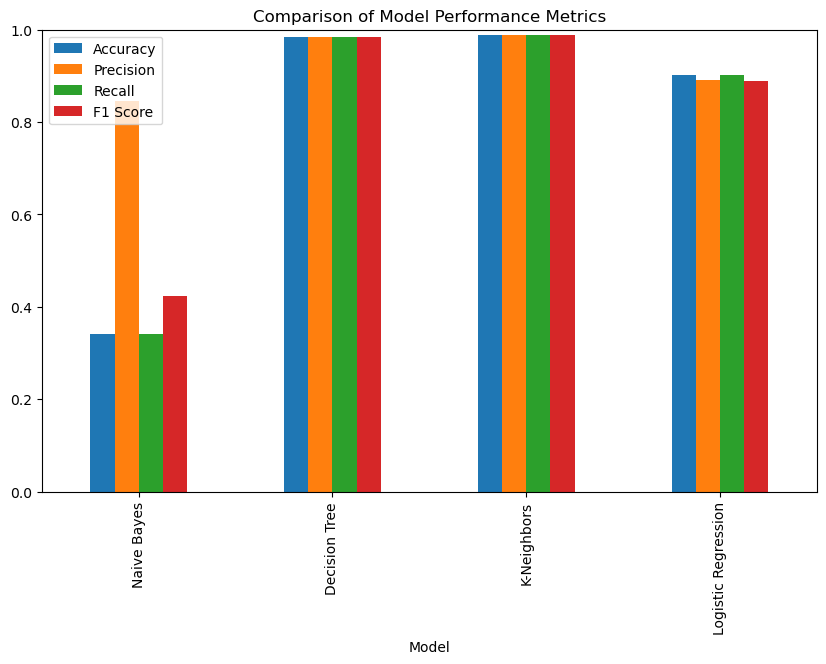

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Λειτουργία για να υπολογίσουμε όλες τις μετρικές αξιολόγησης
def evaluate_model(y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=1)
    recall = recall_score(y_test, y_pred, average='weighted', zero_division=1)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=1)

    return accuracy, precision, recall, f1

# Αποθήκευση των αποτελεσμάτων σε ένα DataFrame για ευκολότερη σύγκριση
results = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

# Προσθήκη των αποτελεσμάτων για κάθε μοντέλο
models = {
    'Naive Bayes': nb_predictions,
    'Decision Tree': dt_predictions,
    'K-Neighbors': knn_predictions,
    'Logistic Regression': lr_predictions
}

for model_name, y_pred in models.items():
    accuracy, precision, recall, f1 = evaluate_model(y_test_encoded, y_pred)
    results = results.append({
        'Model': model_name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    }, ignore_index=True)

# Εμφάνιση των αποτελεσμάτων
print(results)

# Προαιρετικά: δημιουργία διαγραμμάτων για τη σύγκριση των μοντέλων
results.set_index('Model', inplace=True)
results.plot(kind='bar', figsize=(10, 6), ylim=(0, 1), title="Comparison of Model Performance Metrics")


Με βάση τα αποτελέσματα, μπορούμε να εξάγουμε τα ακόλουθα συμπεράσματα για την απόδοση των διαφορετικών classifiers στο Intrusion Detection Evaluation Dataset (CIC-IDS2017):

K-Neighbors (KNN):

Ο KNN κατέγραψε την υψηλότερη ακρίβεια (accuracy) με ποσοστό 98.92%, καθώς και τις υψηλότερες τιμές για την Precision, Recall και F1 Score, που δείχνουν ότι αυτό το μοντέλο είχε τη βέλτιστη απόδοση στον εντοπισμό και την κατηγοριοποίηση των εισβολών στο dataset. Η υψηλή ακρίβεια και F1 Score υποδεικνύουν ότι το μοντέλο όχι μόνο είχε καλή απόδοση στον εντοπισμό των αληθινών θετικών περιπτώσεων αλλά και ελαχιστοποίησε τα ψευδώς θετικά.

Decision Tree:

Το Decision Tree ακολούθησε με πολύ καλή απόδοση, με ακρίβεια 98.49%. Παρά το γεγονός ότι είναι ελαφρώς χαμηλότερο σε σύγκριση με το KNN, οι τιμές του Precision, Recall και F1 Score είναι εξαιρετικά υψηλές και κοντά στο KNN. Αυτό δείχνει ότι το μοντέλο είναι ικανό να χειριστεί το dataset με μεγάλη ακρίβεια, ωστόσο ίσως είναι λιγότερο σταθερό σε σχέση με το KNN, καθώς μπορεί να είναι πιο επιρρεπές σε υπερεκπαίδευση (overfitting).

Logistic Regression:

Το Logistic Regression, με ακρίβεια 90.10%, παρουσιάζει καλή συνολική απόδοση αλλά είναι σαφώς κατώτερο σε σχέση με τα KNN και Decision Tree. Αυτό το μοντέλο είναι πιο απλό και μπορεί να μην μπορεί να αποτυπώσει την πολυπλοκότητα των δεδομένων τόσο αποτελεσματικά όσο τα άλλα δύο μοντέλα. Παρ' όλα αυτά, προσφέρει μια καλή ισορροπία μεταξύ απλότητας και απόδοσης.

Naive Bayes:

Το Naive Bayes παρουσιάζει την χαμηλότερη απόδοση, με ακρίβεια 34.19%. Οι τιμές της Precision και του F1 Score είναι επίσης σημαντικά χαμηλότερες, υποδεικνύοντας ότι αυτό το μοντέλο δεν ήταν σε θέση να αντιμετωπίσει αποτελεσματικά την πολυπλοκότητα των δεδομένων και παρουσίασε μεγάλο αριθμό ψευδώς θετικών ή αρνητικών προβλέψεων.

Συμπεράσματα:

Το μοντέλο K-Neighbors φαίνεται να είναι το πιο αποτελεσματικό για αυτό το dataset, καθώς παρουσιάζει την καλύτερη συνολική απόδοση.
Το Decision Tree παρέχει παρόμοια απόδοση και μπορεί να χρησιμοποιηθεί ως μια ισχυρή εναλλακτική λύση, ιδιαίτερα όταν απαιτείται διαφάνεια στην εξήγηση των αποφάσεων του μοντέλου.
Το Logistic Regression είναι μια καλή επιλογή όταν θέλουμε έναν απλό και γρήγορο αλγόριθμο, αλλά η απόδοσή του είναι χαμηλότερη από τα άλλα δύο πιο σύνθετα μοντέλα.
Το Naive Bayes δεν φαίνεται να είναι κατάλληλο για αυτό το συγκεκριμένο dataset, καθώς οι υποθέσεις του για την κατανομή των δεδομένων δεν φαίνεται να ταιριάζουν καλά με την πραγματικότητα των δεδομένων.